# Student Performance Prediction & Analysis
This notebook presents a complete workflow for predicting student performance using machine learning. It covers data exploration, cleaning, feature engineering, handling class imbalance, model training, evaluation, and visualization of results.

In [2]:
## 1. Import Libraries & Load Data
#We start by importing all necessary libraries and loading the student performance dataset.
import pandas as pd


df = pd.read_csv('student_performance_large_dataset.csv')

In [3]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


## 2. Initial Data Exploration
Let's take a first look at the data: head, tail, info, shape, describe, missing values, duplicates, and columns.

In [4]:
df.tail()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D
9999,S10000,24,Male,8,Visual,20,Yes,87,40,81,No,High,17,4,D


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [6]:
df.shape

(10000, 15)

In [7]:
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [8]:
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
df.corr

<bound method DataFrame.corr of      Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0        S00001   18  Female                    48              Kinesthetic   
1        S00002   29  Female                    30          Reading/Writing   
2        S00003   20  Female                    47              Kinesthetic   
3        S00004   23  Female                    13                 Auditory   
4        S00005   19  Female                    24                 Auditory   
...         ...  ...     ...                   ...                      ...   
9995     S09996   20    Male                    30                 Auditory   
9996     S09997   23  Female                    16                   Visual   
9997     S09998   26    Male                    23                   Visual   
9998     S09999   18    Male                    41          Reading/Writing   
9999     S10000   24    Male                     8                   Visual   

      Online_Course

In [11]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [12]:
categorical_columns = ['Student_ID', 'Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']
df['Final_Grade'] = df['Final_Grade'].astype(str).str.strip()
# Ensure all categorical columns exist in df
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Convert to categorical dtype
for col in categorical_columns:
    df[col] = df[col].astype("category")
    print('\nUnique values for Final_Grade:')
print(df['Final_Grade'].unique())


Unique values for Final_Grade:

Unique values for Final_Grade:

Unique values for Final_Grade:

Unique values for Final_Grade:

Unique values for Final_Grade:

Unique values for Final_Grade:

Unique values for Final_Grade:
['C', 'D', 'B', 'A']
Categories (4, object): ['A', 'B', 'C', 'D']


## 3. Data Cleaning & Feature Engineering
We clean the data, handle categorical columns, and prepare features for modeling.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

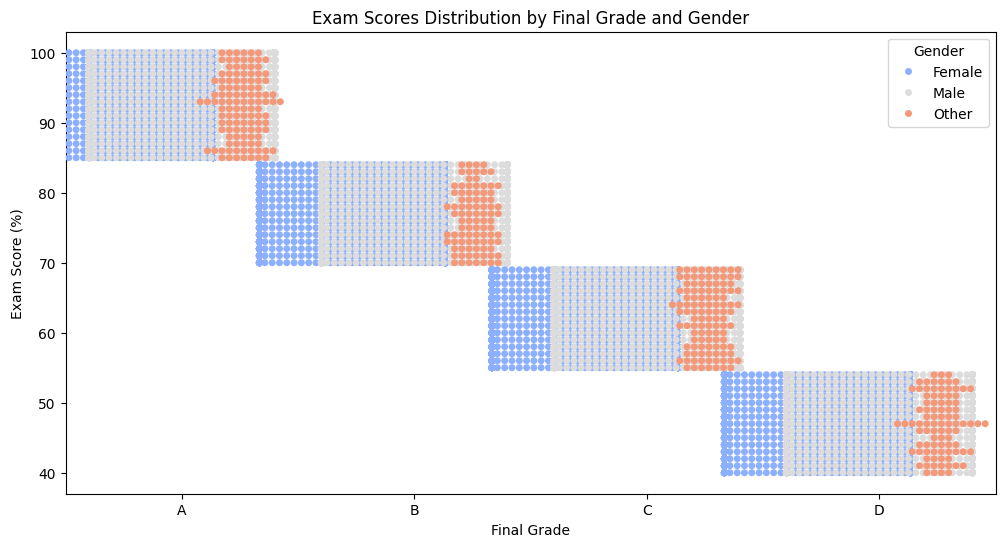

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Final_Grade', y='Exam_Score (%)', hue='Gender', data=df, palette='coolwarm', dodge=True)
plt.title('Exam Scores Distribution by Final Grade and Gender')
plt.xlabel('Final Grade')
plt.ylabel('Exam Score (%)')
plt.legend(title='Gender')
plt.show()

## 4. Exploratory Data Analysis (EDA)
Visualize distributions, relationships, and correlations in the data.

/var/folders/4y/3c6n984j5_bf8d8kj7934_yh0000gn/T/ipykernel_12091/3857468271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Final_Grade', y='Study_Hours_per_Week', data=df, palette='magma', inner="quartile")


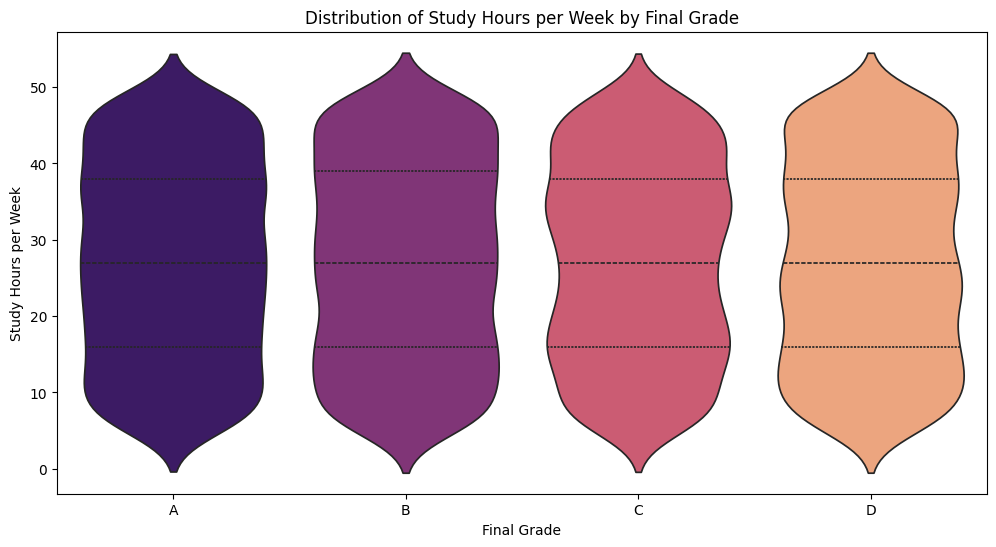

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Final_Grade', y='Study_Hours_per_Week', data=df, palette='magma', inner="quartile")
plt.title('Distribution of Study Hours per Week by Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Study Hours per Week')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x800 with 0 Axes>

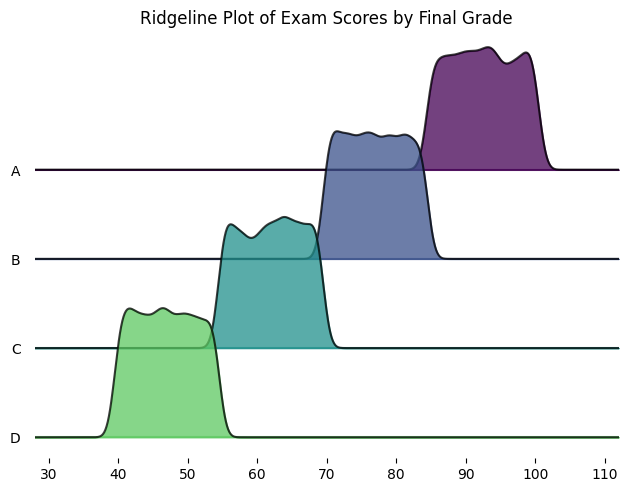

In [20]:
import joypy

plt.figure(figsize=(12, 8))
joypy.joyplot(data=df, by='Final_Grade', column='Exam_Score (%)', colormap=plt.cm.viridis, alpha=0.75)
plt.title('Ridgeline Plot of Exam Scores by Final Grade')
plt.show()

/var/folders/4y/3c6n984j5_bf8d8kj7934_yh0000gn/T/ipykernel_12091/3693898917.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_attendance = df.groupby('Gender')['Attendance_Rate (%)'].mean().reset_index()


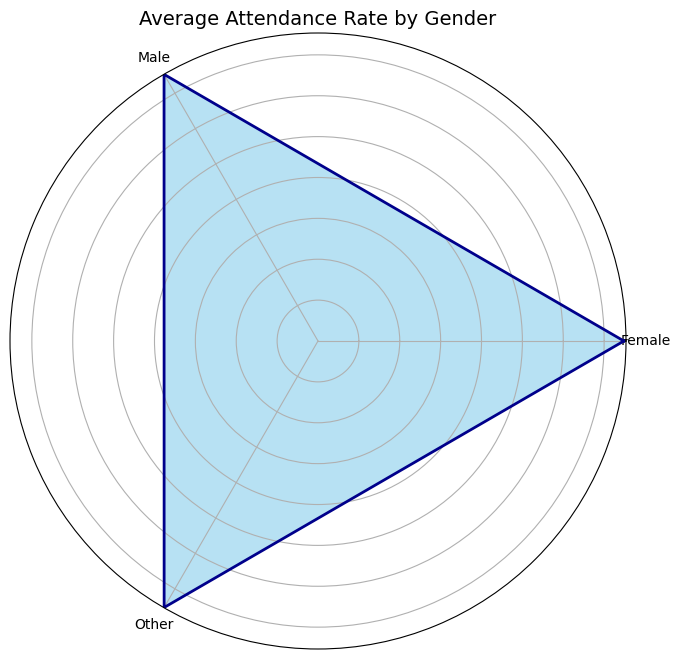

In [21]:
from math import pi

# Group by Gender and calculate mean attendance rate
gender_attendance = df.groupby('Gender')['Attendance_Rate (%)'].mean().reset_index()

# Extract categories and values
categories = list(gender_attendance['Gender'])
values = list(gender_attendance['Attendance_Rate (%)'])

# Compute angles for the circular chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]

# Ensure circular closure by repeating first value and first angle
values.append(values[0])
angles.append(angles[0])

# Create the radial bar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='skyblue', alpha=0.6)
ax.plot(angles, values, color='darkblue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])
plt.title("Average Attendance Rate by Gender", fontsize=14)
plt.show()

<Figure size 1400x1000 with 0 Axes>

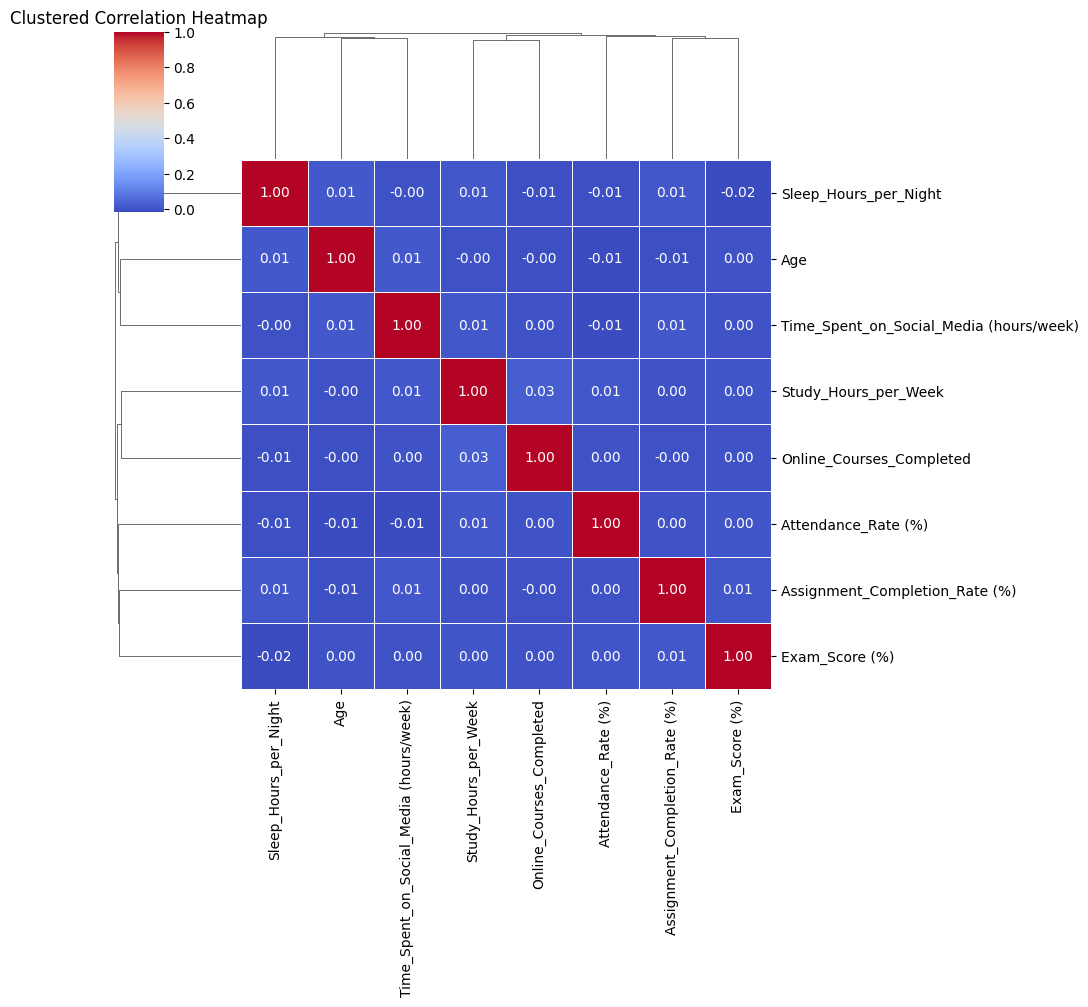

In [22]:
import numpy as np

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
corr = numeric_df.corr()

# Create a clustered heatmap
sns.clustermap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, method='ward')
plt.title('Clustered Correlation Heatmap')
plt.show()

/var/folders/4y/3c6n984j5_bf8d8kj7934_yh0000gn/T/ipykernel_12091/681401434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_df = df.groupby('Final_Grade')['Assignment_Completion_Rate (%)'].mean().reset_index()


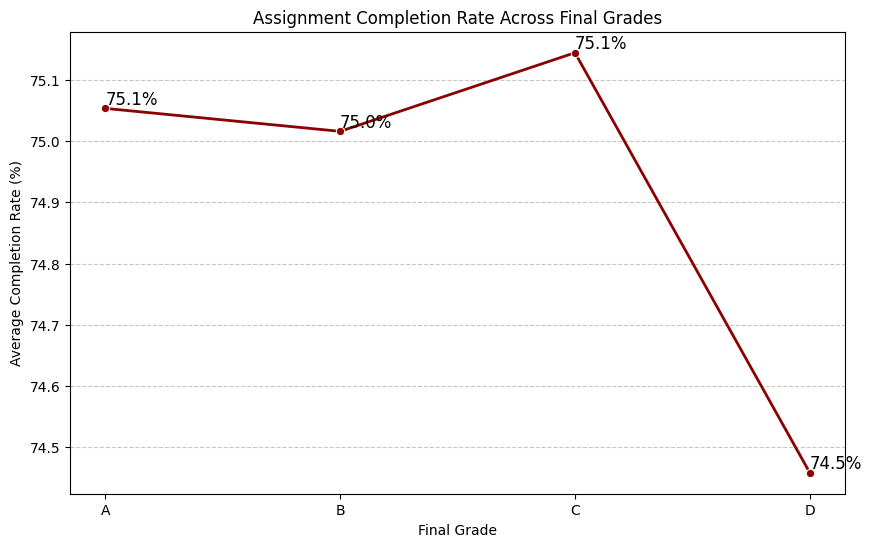

In [23]:
pivot_df = df.groupby('Final_Grade')['Assignment_Completion_Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Final_Grade', y='Assignment_Completion_Rate (%)', data=pivot_df, marker="o", color="darkred", linewidth=2)
for index, row in pivot_df.iterrows():
    plt.text(row['Final_Grade'], row['Assignment_Completion_Rate (%)'], f"{row['Assignment_Completion_Rate (%)']:.1f}%", 
             verticalalignment='bottom', fontsize=12, color='black')

plt.title('Assignment Completion Rate Across Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Average Completion Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Original shape: (10000, 15)
Shape after removing duplicates: (10000, 15)
Class distribution before SMOTE: Counter({np.int64(0): 2142, np.int64(1): 1964, np.int64(2): 1952, np.int64(3): 1942})
Class distribution after SMOTE: Counter({np.int64(2): 2142, np.int64(1): 2142, np.int64(0): 2142, np.int64(3): 2142})

Logistic Regression Results:
Accuracy: 0.96
Precision (weighted): 0.96
Recall (weighted): 0.96
F1-score (weighted): 0.96
Precision (macro): 0.96
Recall (macro): 0.96
F1-score (macro): 0.96
Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.96      0.97       536
           B       0.93      0.96      0.94       491
           C       0.96      0.95      0.95       488
           D       0.97      0.99      0.98       485

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
[[514  22   0   0]
 [  9

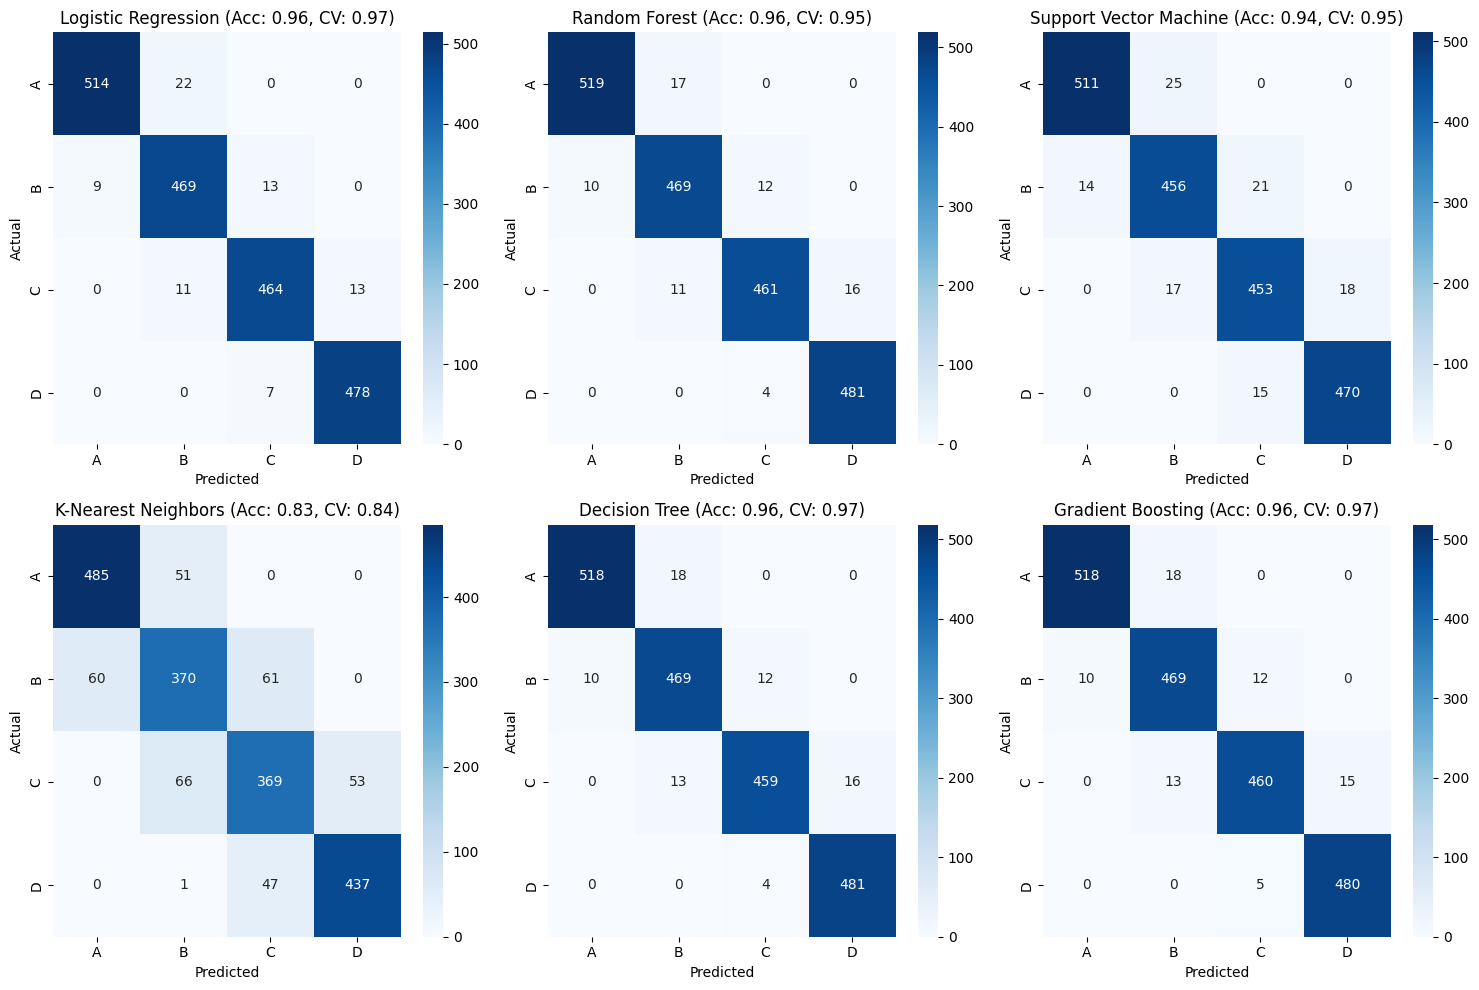

Random Forest: 0.96
Decision Tree: 0.96
Gradient Boosting: 0.96
Logistic Regression: 0.96
Support Vector Machine: 0.94
K-Nearest Neighbors: 0.83


In [37]:
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Remove duplicates
print(f"Original shape: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Remove rows with missing target
df = df.dropna(subset=['Final_Grade'])

features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 
            'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 
            'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
X = df[features]
y = df['Final_Grade']

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Stratified split for balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balance
print('Class distribution before SMOTE:', Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Class distribution after SMOTE:', Counter(y_train_resampled))

# Scaling the features (important for SVM & Logistic Regression)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Add random noise to features to prevent overfitting
np.random.seed(42)
noise = np.random.normal(0, 0.05, X_train_resampled.shape)
X_train_resampled_noisy = X_train_resampled + noise
X_test_noisy = X_test + np.random.normal(0, 0.05, X_test.shape)

# Further restrict model complexity
models = {
    "Logistic Regression": LogisticRegression(C=0.2, max_iter=80),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=3, min_samples_leaf=20, random_state=42),
    "Support Vector Machine": SVC(C=0.5, kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=13, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_leaf=20),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_depth=2)
}

results = {}
plt.figure(figsize=(15, 10))
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, model) in enumerate(models.items(), 1):
    # Cross-validation for realistic accuracy
    cv_scores = cross_val_score(model, X_train_resampled_noisy, y_train_resampled, cv=skf, scoring='accuracy')
    model.fit(X_train_resampled_noisy, y_train_resampled)
    y_pred = model.predict(X_test_noisy)
    acc = accuracy_score(y_test, y_pred)
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    results[name] = acc

    # Confusion Matrix Plot
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{name} (Acc: {acc:.2f}, CV: {np.mean(cv_scores):.2f})")

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision (weighted): {precision_weighted:.2f}")
    print(f"Recall (weighted): {recall_weighted:.2f}")
    print(f"F1-score (weighted): {f1_weighted:.2f}")
    print(f"Precision (macro): {precision_macro:.2f}")
    print(f"Recall (macro): {recall_macro:.2f}")
    print(f"F1-score (macro): {f1_macro:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    print(cm)

plt.tight_layout()
plt.show()

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, acc in sorted_results:
    print(f"{name}: {acc:.2f}")

## 5. Model Preparation, Training & Evaluation
Handle class imbalance, preprocess features, train models, and evaluate with cross-validation and detailed metrics.

/var/folders/4y/3c6n984j5_bf8d8kj7934_yh0000gn/T/ipykernel_12091/4173464039.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_values, y=model_names, palette="viridis")


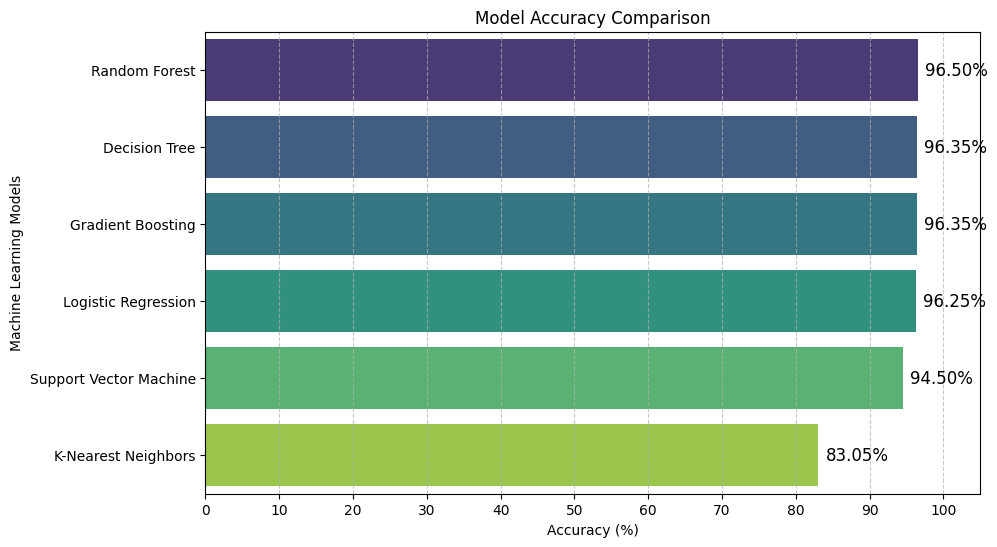

In [38]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract model names and their accuracy values
model_names = [name for name, acc in sorted_results]
accuracy_values = [acc * 100 for _, acc in sorted_results]  # Convert to percentage

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_values, y=model_names, palette="viridis")

# Labeling
plt.xlabel("Accuracy (%)")
plt.ylabel("Machine Learning Models")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 105)  # Keep max at 105 for better spacing
plt.xticks(range(0, 101, 10))
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display values on bars
for index, value in enumerate(accuracy_values):
    plt.text(value + 1, index, f"{value:.2f}%", va='center', fontsize=12)

plt.show()

## 6. Results Visualization
Compare model performance visually using bar plots and confusion matrices.

In [39]:
#%pip install catboost

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Restrict hyperparameter search space to avoid overfitting
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 0.2, 0.5]
    },
    "Random Forest": {
        'n_estimators': [10, 20, 30],
        'max_depth': [2, 3, 4],
        'min_samples_leaf': [10, 20]
    },
    "Support Vector Machine": {
        'C': [0.2, 0.5],
        'kernel': ['rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [11, 13],
        'weights': ['distance']
    },
    "Decision Tree": {
        'max_depth': [2, 3, 4],
        'min_samples_leaf': [10, 20]
    },
    "Gradient Boosting": {
        'n_estimators': [10, 20, 30],
        'learning_rate': [0.05, 0.07],
        'max_depth': [2, 3]
    },
    "XGBoost": {
        'n_estimators': [10, 20, 30],
        'learning_rate': [0.05, 0.07],
        'max_depth': [2, 3]
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv('student_performance_large_dataset.csv')

features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 
            'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 
            'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
X = df[features]
y = df['Final_Grade']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add random noise to features to prevent overfitting
np.random.seed(42)
noise_train = np.random.normal(0, 0.05, X_train.shape)
noise_test = np.random.normal(0, 0.05, X_test.shape)
X_train_noisy = X_train + noise_train
X_test_noisy = X_test + noise_test

best_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_noisy, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_noisy)

    acc = accuracy_score(y_test, y_pred)
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    best_models[name] = {
        'model': best_model,
        'accuracy': acc,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision (weighted): {precision_weighted:.2f}")
    print(f"Recall (weighted): {recall_weighted:.2f}")
    print(f"F1-score (weighted): {f1_weighted:.2f}")
    print(f"Precision (macro): {precision_macro:.2f}")
    print(f"Recall (macro): {recall_macro:.2f}")
    print(f"F1-score (macro): {f1_macro:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.97
Precision (weighted): 0.97
Recall (weighted): 0.97
F1-score (weighted): 0.97
Precision (macro): 0.97
Recall (macro): 0.97
F1-score (macro): 0.97
Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.98      0.98       536
           B       0.96      0.95      0.96       491
           C       0.95      0.97      0.96       488
           D       0.98      0.98      0.98       485

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix:
[[523  13   0   0]
 [  9 468  14   0]
 [  0   7 471  10]
 [  0   0  11 474]]
Training Random Forest...

Logistic Regression Results:
Accuracy: 0.97
Precision (weighted): 0.97
Recall (weighted): 0.97
F1-score (weighted): 0.97
Precision (macro): 0.97
Recall (macro): 0.97
F1-score (macro): 0.97
Classific

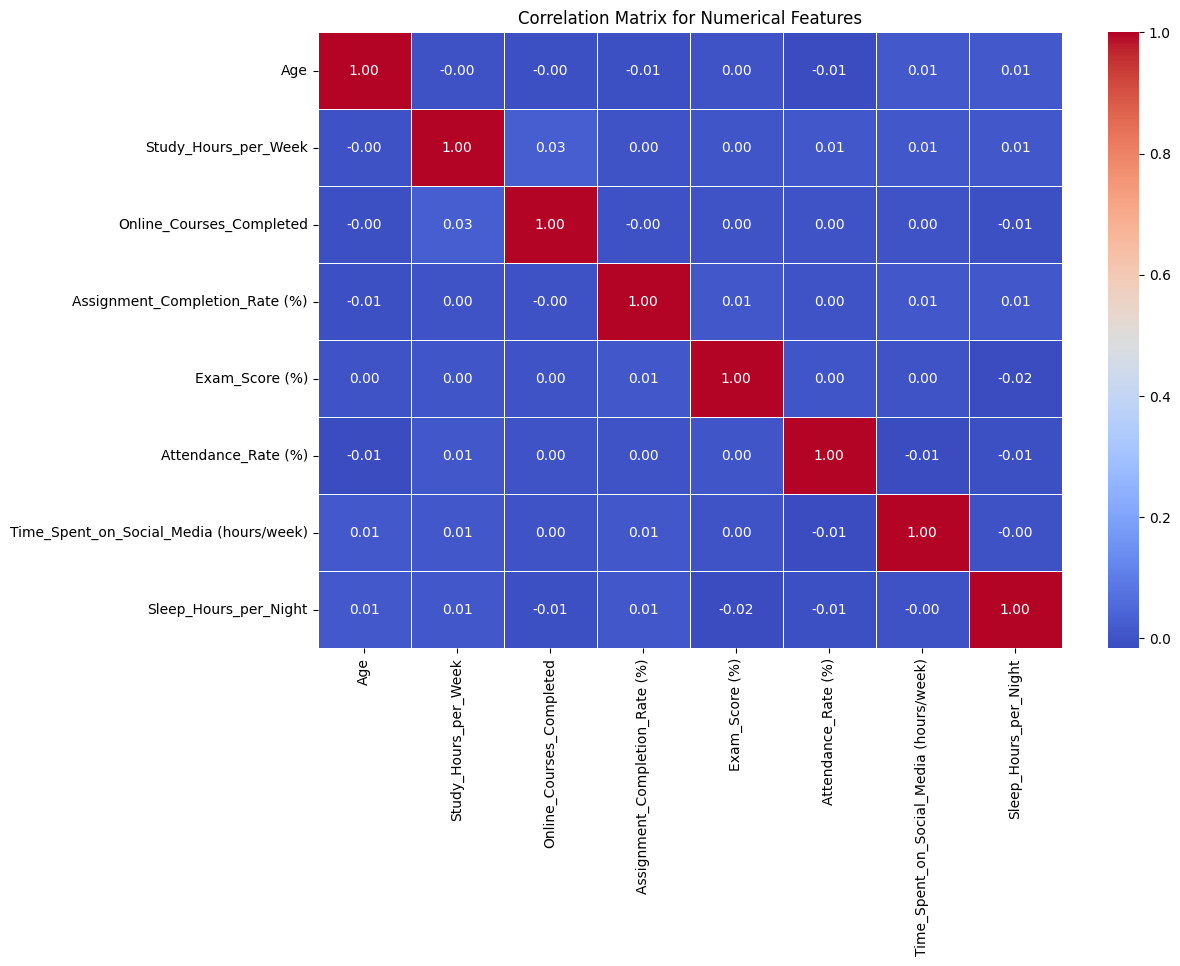

Chi-Square Test Results:
Student_ID: Chi2 = 30000.00, p-value = 0.4940
Gender: Chi2 = 3.90, p-value = 0.6906
Preferred_Learning_Style: Chi2 = 5.41, p-value = 0.7976
Participation_in_Discussions: Chi2 = 0.57, p-value = 0.9039
Use_of_Educational_Tech: Chi2 = 1.56, p-value = 0.6688
Self_Reported_Stress_Level: Chi2 = 9.23, p-value = 0.1612


In [40]:
from scipy.stats import chi2_contingency

# Correlation for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Chi-square test for categorical features
chi2_results = {}
for col in categorical_columns:
    if col != 'Final_Grade':  # Skip the target variable
        contingency_table = pd.crosstab(df[col], df['Final_Grade'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[col] = {'Chi2': chi2, 'p-value': p}

# Display chi-square results
print("Chi-Square Test Results:")
for col, result in chi2_results.items():
    print(f"{col}: Chi2 = {result['Chi2']:.2f}, p-value = {result['p-value']:.4f}")

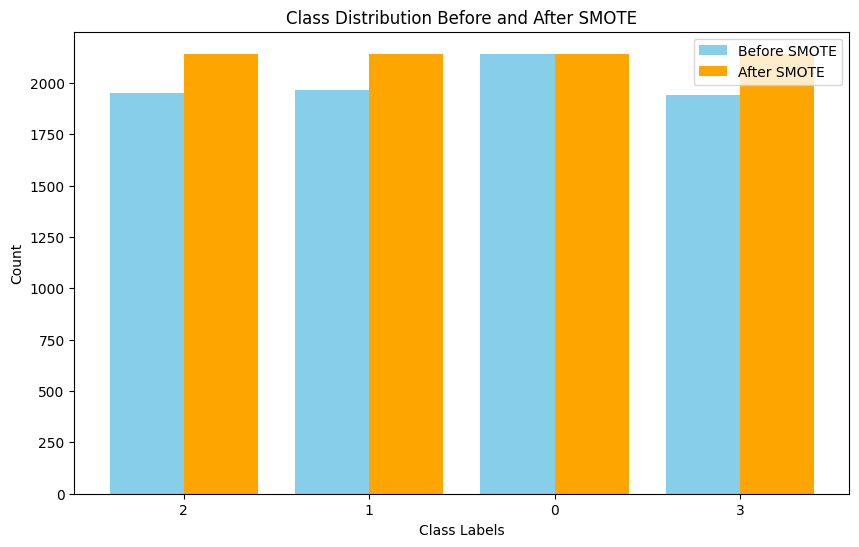

In [42]:
from collections import Counter

# Display class distribution before SMOTE
before_smote = Counter(y_train)
after_smote = Counter(y_train_resampled)

# Create a bar plot
labels = list(before_smote.keys())
before_counts = list(before_smote.values())
after_counts = [after_smote[label] for label in labels]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, before_counts, width=0.4, label='Before SMOTE', color='skyblue', align='center')
plt.bar([i + 0.4 for i in x], after_counts, width=0.4, label='After SMOTE', color='orange', align='center')

plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution Before and After SMOTE')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()

## 7. Conclusion & Insights
- Summarize key findings from the analysis and modeling.
- Discuss which models performed best and why.
- Suggest next steps or recommendations for further study.